In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

In [2]:
# Carregando dataset

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dentro do *dataset* a valores iguais a 0, nas colunas *pressão arterial* e *insulina*. Os valores ausentes foram substituídos por 0 em tais colunas. Com essa informação vamos verificar a quantidade de 0 presentes e após isso substituídos pela média ou valores medianos com base em sua distribuição.

In [3]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
print(data.isin({0}).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Portanto, as colunas com a quais vamos trabalhar são *GLICOSE*, *PRESSÃO ARTERIAL*, *ESPESSURA DA PELE*, *INSULINA* e *IMC*. Em primeiro lugar vamos verificar suas distribuições. 

# **Análise Exploratória** <h1>

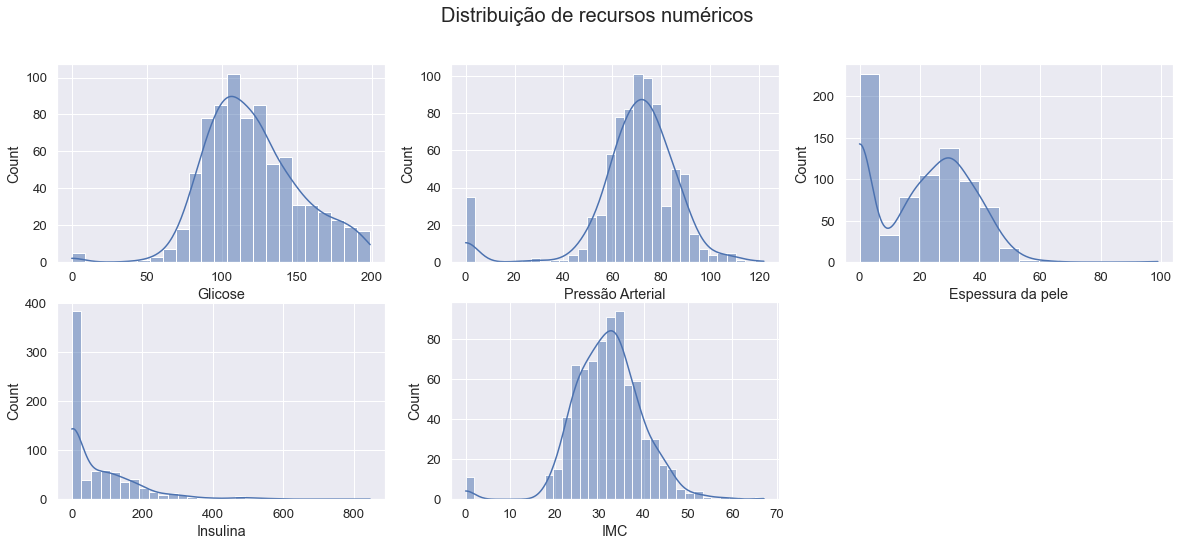

In [7]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 3, figsize = (20, 8))
ax[1, 2].axis('off')

plt.suptitle('Distribuição de recursos numéricos', fontsize = 20)

ax1 = sns.histplot(x ='Glucose', data= data, kde= True, ax= ax[0, 0])
ax1.set(xlabel = 'Glicose')

ax2 = sns.histplot(x ='BloodPressure', data= data, kde= True, ax= ax[0, 1])
ax2.set(xlabel = 'Pressão Arterial')

ax3 = sns.histplot(x ='SkinThickness', data= data, kde= True, ax= ax[0, 2])
ax3.set(xlabel = 'Espessura da pele')

ax4 = sns.histplot(x ='Insulin', data= data, kde= True, ax= ax[1, 0])
ax4.set(xlabel = 'Insulina')

ax5 = sns.histplot(x ='BMI', data= data, kde= True, ax= ax[1, 1])
ax5.set(xlabel = 'IMC')

plt.show()

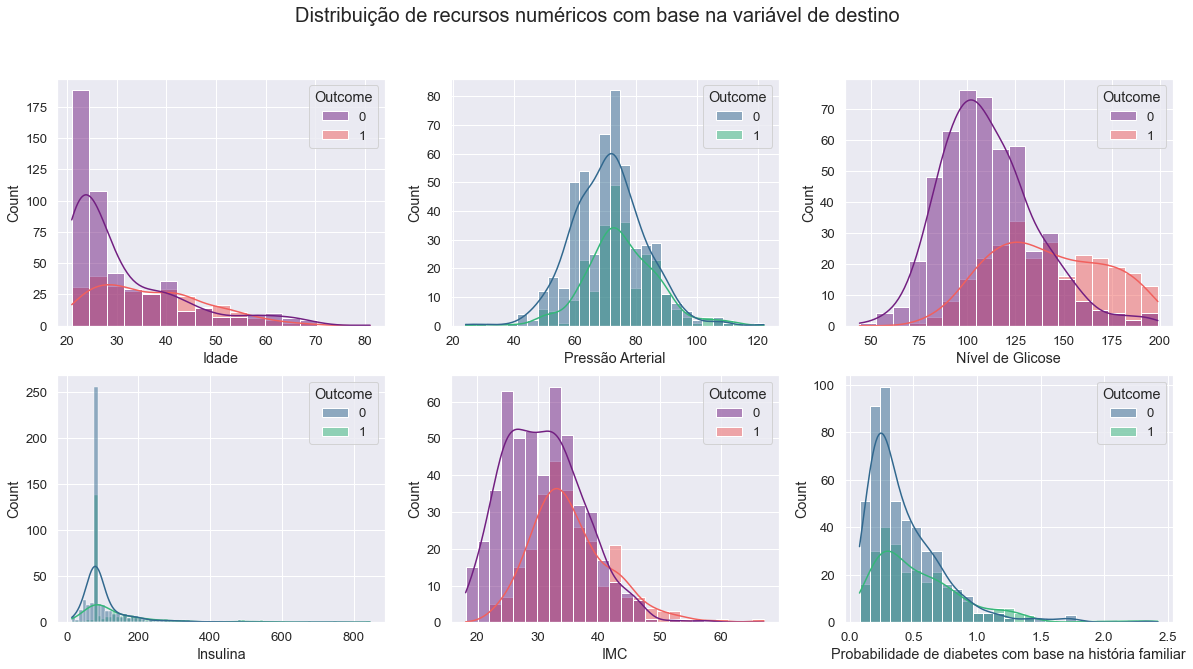

In [8]:
for col in ['BMI', 'Glucose', 'BloodPressure']:
  data[col] = data[col].replace({0 : data[col].median()})

for col in ['Insulin', 'SkinThickness']:
  data[col] = data[col].replace({0 : data[col].mean()})
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 3, figsize = (20, 10))

plt.suptitle('Distribuição de recursos numéricos com base na variável de destino', fontsize = 20)

ax1 = sns.histplot(x ='Age', data= data, hue= 'Outcome', kde= True, ax= ax[0, 0], palette='magma')
ax1.set(xlabel = 'Idade')

ax2 = sns.histplot(x ='BloodPressure', data= data, hue= 'Outcome', kde= True, ax= ax[0, 1], palette='viridis')
ax2.set(xlabel = 'Pressão Arterial')

ax3 = sns.histplot(x ='Glucose', data= data, hue= 'Outcome', kde= True, ax= ax[0, 2], palette='magma')
ax3.set(xlabel = 'Nível de Glicose')

ax4 = sns.histplot(x ='Insulin', data= data, hue= 'Outcome', kde= True, ax= ax[1, 0], palette='viridis')
ax4.set(xlabel = 'Insulina')

ax5 = sns.histplot(x ='BMI', data= data, hue= 'Outcome', kde= True, ax= ax[1, 1], palette='magma')
ax5.set(xlabel = 'IMC')

ax6 = sns.histplot(x ='DiabetesPedigreeFunction', data= data, hue= 'Outcome', kde= True, ax= ax[1, 2], palette='viridis')
ax6.set(xlabel = 'Probabilidade de diabetes com base na história familiar')

plt.show()

**Inferência**

*Pessoas com glicose alta são muito propensas a ter diabetes.


*Pessoas que têm um IMC inferior a 30 são menos propensas a terem diabetes.

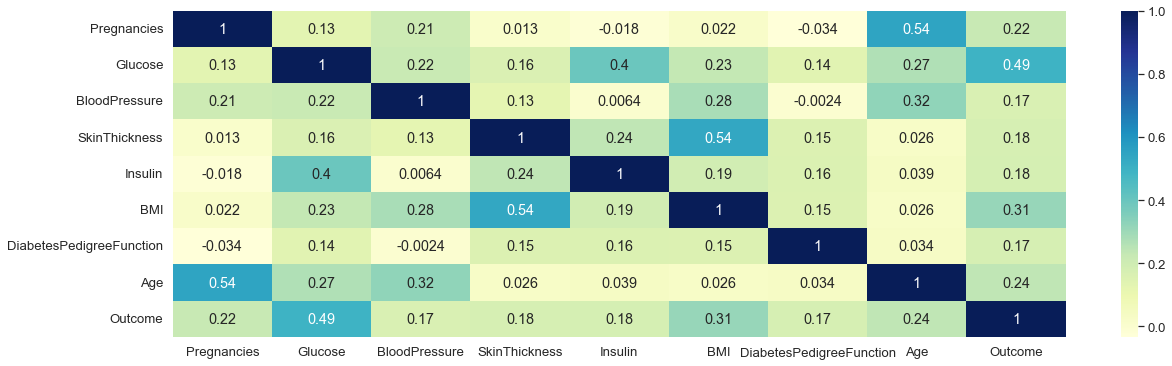

In [9]:
plt.figure(figsize = (20, 6))
sns.heatmap(data.corr(), cmap= 'YlGnBu', annot = True)
plt.show()

A glicose é a mais correlacionada com a variável de destino seguida pelo IMC.

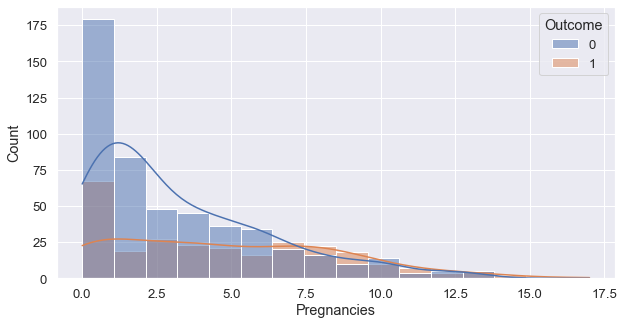

In [10]:
plt.figure(figsize = (10, 5))
sns.histplot(x = data['Pregnancies'], hue = data['Outcome'], kde = True)
plt.show()

In [11]:
data['Outcome'] = data['Outcome'].astype(str)

# **Verificação de distorção** <h1>

In [12]:
def skewness(data):
    skew_df = pd.DataFrame(data.select_dtypes(np.number).columns, columns=['Feature'])
    skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(data[feature]))
    skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
    return skew_df.sort_values(by = 'Absolute Skew', ascending = False).reset_index(drop = True)

skewness(data)

,Feature,Skew,Absolute Skew
0,Insulin,3.285392,3.285392
1,DiabetesPedigreeFunction,1.916159,1.916159
2,SkinThickness,1.224273,1.224273
3,Age,1.127389,1.127389
4,Pregnancies,0.899912,0.899912
5,BMI,0.599884,0.599884
6,Glucose,0.534541,0.534541
7,BloodPressure,0.141608,0.141608


Todos os recursos estão distorcidos, exceto glicose e pressão arterial. Vamos aplicar a transformação de log para lidar com isso

In [13]:
for col in ['Insulin', 'DiabetesPedigreeFunction', 'SkinThickness',
            'Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure']:
            data[col] = np.log1p(data[col])

<Figure size 864x720 with 0 Axes>

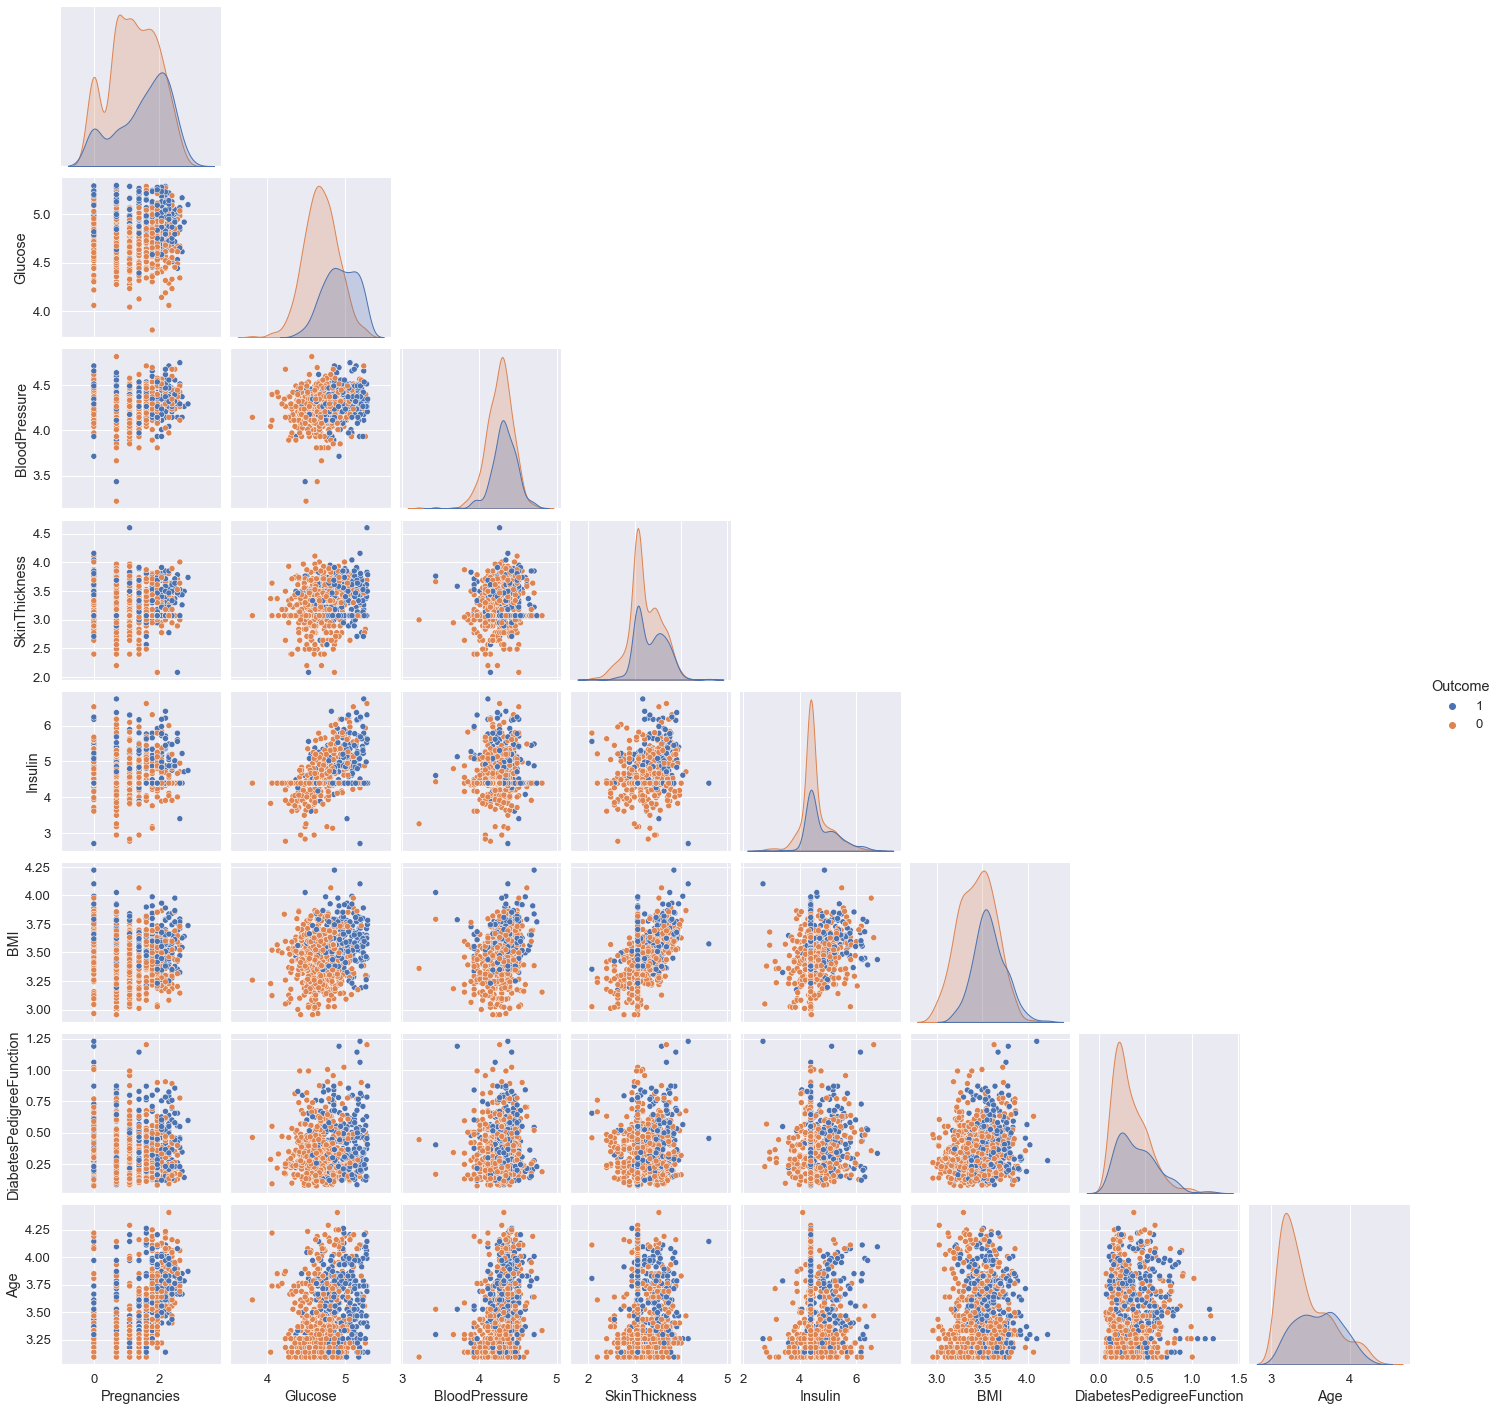

In [14]:
plt.figure(figsize=(12, 10))
sns.pairplot(data = data, hue="Outcome", corner=True, diag_kind="kde");

# **Regressão Logística** <h1>

In [15]:
#Splitting
from sklearn.model_selection import train_test_split

X = data.drop('Outcome', axis = 1)
y = data['Outcome'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [16]:
#Scaling
mean = X_train.mean()
std = X_test.std()

X_train = (X_train - mean) / std
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = (X_test - mean) / std
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [17]:
#Modelo
class LogisticRegression:

    def __init__(self, learning_rate = 0.01, no_of_iterations = 1000):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.costs = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        
        self.X = X
        self.Y= y
        self.m = X.shape[0] # Número de linhas nos dados
        self.n = X.shape[1] # Número de colunas nos dados
        self.w = np.zeros(self.n)
        self.b = 0

        for i in range(0, self.no_of_iterations):
            
            y_hat = self.sigmoid(self.X.dot(self.w) + self.b)

            cost = (-self.Y * np.log(y_hat) - (1 - self.Y) * np.log(1 - y_hat)).mean()
            self.costs.append(cost)

            dw = (1 / self.m) * np.dot(self.X.T, (y_hat - self.Y))
            db = (1 / self.m) * np.sum(y_hat - self.Y)

            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db

    def predict(self, X):
        y_pred = self.sigmoid(X.dot(self.w) + self.b) 
        y_pred = np.where(y_pred > 0.4, 1, 0)
        return y_pred

In [18]:
model = LogisticRegression(learning_rate= 0.1, no_of_iterations= 200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

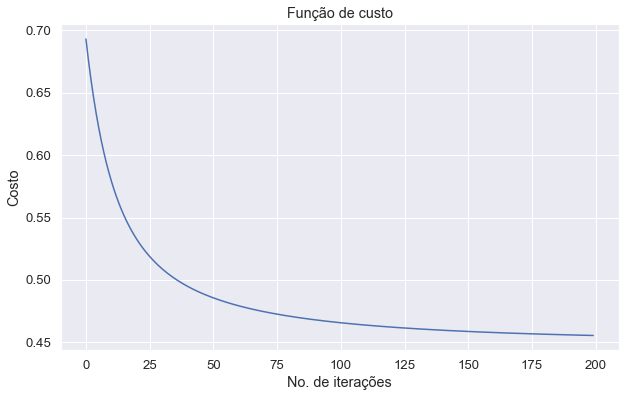

In [19]:
plt.figure(figsize = (10, 6))
plt.title('Função de custo')
plt.xlabel('No. de iterações')
plt.ylabel('Costo')
plt.plot(model.costs)
plt.show()

# **Avaliação do modelo** <h1>

In [20]:
def accuracy(actual, predicted):
    correct_predictions = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct_predictions += 1
    return correct_predictions / float(len(actual)) * 100.0

In [21]:
print(f'Accuracy: {accuracy(y_test.values, y_pred)}%')

Accuracy: 74.67532467532467%
